# Data Exploration

In [1]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
# importing data and reading csv file
data = pd.read_csv("Training Data.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [5]:
# finding missing values in each coloum of the data
data.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
#drop the ID as it is not necessary 
data = data.drop(['Id'], axis=1)

In [7]:
# finding target variable ratio
print(data['Risk_Flag'].value_counts(normalize=True)*100)

0    87.7
1    12.3
Name: Risk_Flag, dtype: float64


In [8]:
# function to plot histogram
def plot_histogram(data, labels):
    for label in labels:
        hist_data = data[label].value_counts(normalize=True)
        plt.title('Histogram: ' + label)
        plt.barh(y=hist_data.index, width=hist_data*100)
        
        plt.xlabel('Percentage (%)')
        plt.tight_layout()
        plt.show()

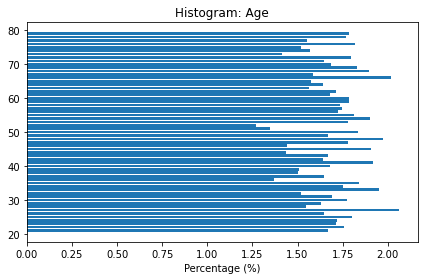

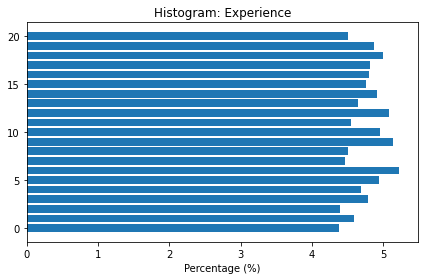

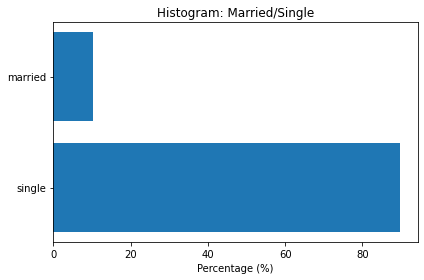

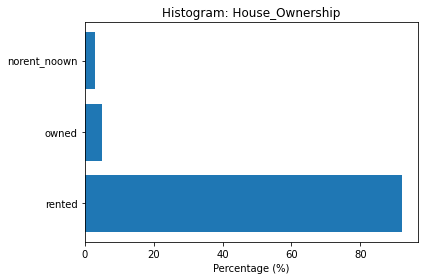

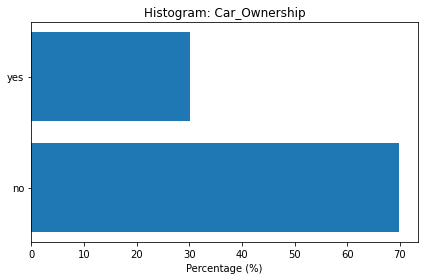

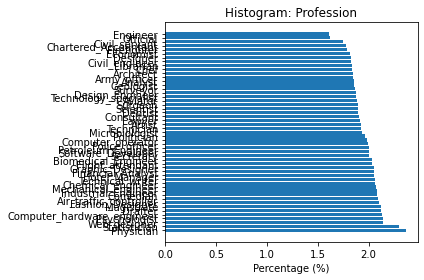

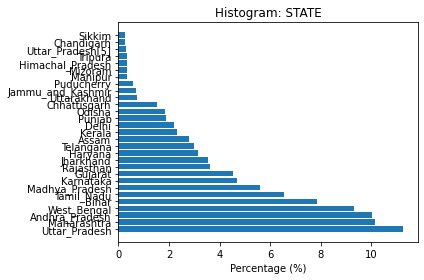

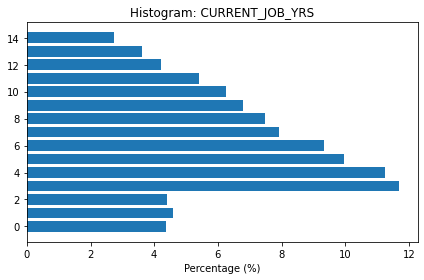

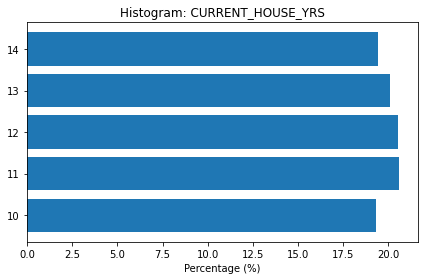

In [9]:
#Data distribution of each feature
labels = ['Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'STATE','CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS' ]
plot_histogram(data, labels)


In [10]:
#data Cleaning
# renaming few column names
data.rename(columns={'Married/Single':'Is_Married', 'Car_Ownership': 'Has_Car'},inplace=True)

In [11]:
data.head()

,Income,Age,Experience,Is_Married,House_Ownership,Has_Car,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Encoding data

## Labe Encoding

In [12]:
#function to implement label encoding
from sklearn import preprocessing

def labelEncoding(data, labels):
    for label in labels:  
        le = preprocessing.LabelEncoder()
        le.fit(data[label])
        df.loc[:, label] = le.transform(data[label].copy())
        
    return df

In [13]:
#making a copy of the data and performing label encoding on the copied data
df = data.copy()
labels = ['Is_Married', 'House_Ownership', 'Has_Car', 'Profession', 'CITY', 'STATE']
df = labelEncoding(df, labels)
df.head()

,Income,Age,Experience,Is_Married,House_Ownership,Has_Car,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1


## One Hot Encoding

In [14]:
#coverting Is_Married and Has_Car colums to binary
df1 = data
df1['Is_Married'].replace('single', 0, inplace=True)
df1['Is_Married'].replace('married', 1, inplace=True)
df1['Has_Car'].replace('no', 0, inplace=True)
df1['Has_Car'].replace('yes', 1, inplace=True)
df1.head()

,Income,Age,Experience,Is_Married,House_Ownership,Has_Car,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,0,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,1,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,0,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,0,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [15]:
labels = ['House_Ownership', 'Profession', 'CITY', 'STATE']
df1 = pd.get_dummies(df1)

In [16]:
df1.iloc[:,8:11].head()

,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


# Building Model 

In [17]:
#importing the required models from the sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

#appending all models into models list so that we can loop all models
models = []
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('Naïve Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('AdaBoost Classifier', AdaBoostClassifier()))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')))
#commenting these models as these models exexution time is more than expected
#models.append(('SVM', svm.SVC()))
#models.append(('KNN',  KNeighborsClassifier(n_neighbors=3)))

In [18]:
#building models and calculating metrics including ploting Roc curve and confussion matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def createModel(X,y):
    #Spliting dataset to build model
    test_validation = 0.3
    random_no = 78
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_validation, random_state=random_no)
    for name, model in models:
        this_model = model
        this_model.fit(X_train, y_train)
        y_pred = this_model.predict(X_test)
        print()
        print(name)
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        print("Precision:",metrics.precision_score(y_test, y_pred))
        print("Recall:",metrics.recall_score(y_test, y_pred))
        print("F1 score:", metrics.f1_score(y_test, y_pred))
        y_pred_proba = this_model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        print("AUC:"+str(auc))
        plt.plot(fpr,tpr,label="data, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()
        print(confusion_matrix(y_test, y_pred))

# Relation between features

In [19]:
#ploting co-relation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Income,Age,Experience,Is_Married,House_Ownership,Has_Car,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.002682,0.016433,0.004068,0.000725,-0.001919,-0.004067,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,-0.005323,-0.009820,0.009395,-0.008551,0.002104,-0.004985,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,-0.001752,-0.007912,0.007519,0.000975,-0.025703,-0.001251,0.646098,0.019309,-0.034523
Is_Married,0.002682,-0.005323,-0.001752,1.000000,-0.022501,0.001206,-0.007534,0.012280,-0.009477,0.004251,-0.007539,0.021092
House_Ownership,0.016433,-0.009820,-0.007912,-0.022501,1.000000,-0.001233,0.001242,-0.014447,-0.007792,-0.009790,-0.005618,0.023622
Has_Car,0.004068,0.009395,0.007519,0.001206,-0.001233,1.000000,0.011887,0.001648,0.026000,0.011099,0.000251,-0.024036
Profession,0.000725,-0.008551,0.000975,-0.007534,0.001242,0.011887,1.000000,0.018852,0.001557,-0.004536,0.001954,-0.004900
CITY,-0.001919,0.002104,-0.025703,0.012280,-0.014447,0.001648,0.018852,1.000000,-0.038040,-0.027353,-0.010654,0.004575
STATE,-0.004067,-0.004985,-0.001251,-0.009477,-0.007792,0.026000,0.001557,-0.038040,1.000000,0.008745,0.007281,-0.003401
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,0.004251,-0.009790,0.011099,-0.004536,-0.027353,0.008745,1.000000,0.005372,-0.016942


Text(0.5, 1.0, 'Average Income by Age')

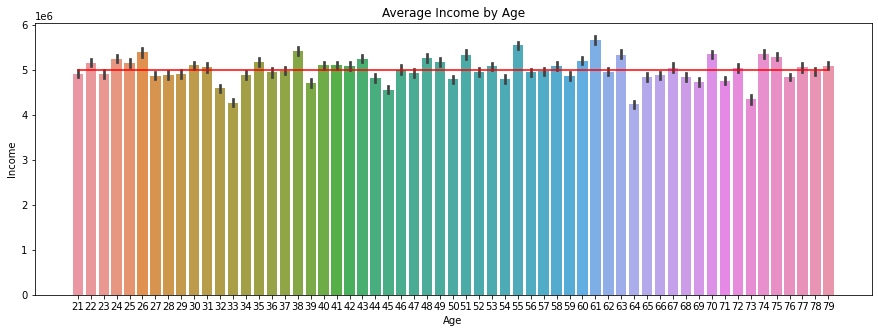

In [20]:
# plotting relation between age and income
plt.subplots(figsize=(15,5))
sns.barplot(data=df, x='Age', y='Income')
plt.plot(df['Income'].mean() * np.ones(df['Age'].nunique()), label='General average', color='red')
plt.title("Average Income by Age")

Text(0.5, 1.0, 'Average Income by Profession')

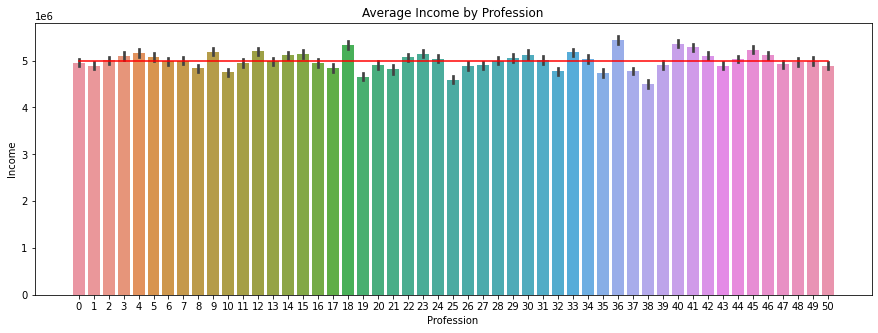

In [21]:
# plotting relation between Profession and income
plt.subplots(figsize=(15,5))
sns.barplot(data=df, x='Profession', y='Income')
plt.plot(df['Income'].mean() * np.ones(df['Profession'].nunique()), label='General average', color='red')
plt.title("Average Income by Profession")

Text(0.5, 1.0, 'Average Income by State')

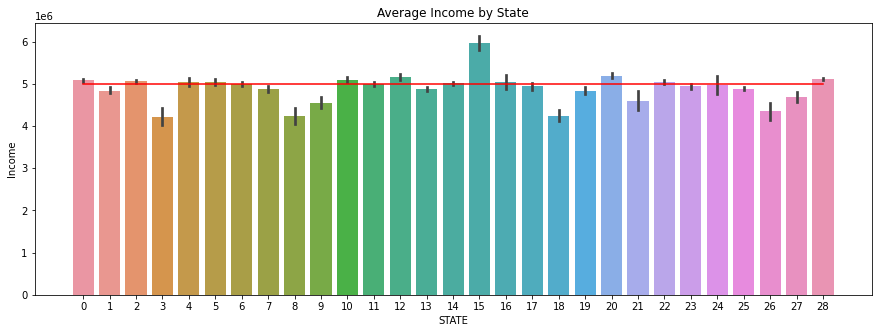

In [22]:
# plotting relation between State and income
plt.subplots(figsize=(15,5))
sns.barplot(data=df, x='STATE', y='Income')
plt.plot(df['Income'].mean() * np.ones(df['STATE'].nunique()), label='General average', color='red')
plt.title("Average Income by State")

In [23]:
#calculating state wise Risk flag count 
state_risk = df.groupby(['Risk_Flag', 'STATE']).size()
pd.DataFrame(state_risk)

0
Risk_Flag STATE       
0         0      22362
          1       6132
          2      17197
          3        595
          4       3323
          5       4916
          6      10065
          7       6910
          8        722
          9       1497
          10      7770
          11     10666
          12      4835
          13     11942
          14     22667
          15       666
          16       755
          17      3994
          18      1266
          19      4295
          20      7882
          21       580
          22     14831
          23      6545
          24       673
          25     25057
          26       646
          27      1741
          28     20474
1         0       2935
          1        930
          2       2583
          3         61
          4        511
          5        574
          6       1343
          7        980
          8        111
          9        283
          10      1195
          11      1189
          12       970
          13      2180
          14      2895
          15       183
          16        94
          17       664
          18       167
          19       425
          20      1292
          21        28
          22      1706
          23       979
          24       136
          25      3343
          26        97
          27       133
          28      3009

In [24]:
#finding the volume of customers state wise
state = df.groupby(['STATE']).size()
state

STATE
0     25297
1      7062
2     19780
3       656
4      3834
5      5490
6     11408
7      7890
8       833
9      1780
10     8965
11    11855
12     5805
13    14122
14    25562
15      849
16      849
17     4658
18     1433
19     4720
20     9174
21      608
22    16537
23     7524
24      809
25    28400
26      743
27     1874
28    23483
dtype: int64

In [25]:
state_risk_prop = state_risk.div(state, level='STATE') * 100
state_risk_prop = pd.DataFrame(state_risk_prop)
state_risk_prop

0
Risk_Flag STATE           
0         0      88.397834
          1      86.830926
          2      86.941355
          3      90.701220
          4      86.671883
          5      89.544627
          6      88.227560
          7      87.579214
          8      86.674670
          9      84.101124
          10     86.670385
          11     89.970477
          12     83.290267
          13     84.563093
          14     88.674595
          15     78.445230
          16     88.928151
          17     85.744955
          18     88.346127
          19     90.995763
          20     85.916721
          21     95.394737
          22     89.683739
          23     86.988304
          24     83.189122
          25     88.228873
          26     86.944818
          27     92.902882
          28     87.186475
1         0      11.602166
          1      13.169074
          2      13.058645
          3       9.298780
          4      13.328117
          5      10.455373
          6      11.772440
          7      12.420786
          8      13.325330
          9      15.898876
          10     13.329615
          11     10.029523
          12     16.709733
          13     15.436907
          14     11.325405
          15     21.554770
          16     11.071849
          17     14.255045
          18     11.653873
          19      9.004237
          20     14.083279
          21      4.605263
          22     10.316261
          23     13.011696
          24     16.810878
          25     11.771127
          26     13.055182
          27      7.097118
          28     12.813525

In [26]:
agg_by_state_income = df[['STATE', 'Risk_Flag']].groupby(['STATE', 'Risk_Flag']).count().reset_index()
agg_by_state_income

,STATE,Risk_Flag
0,0,0
1,0,1
2,1,0
3,1,1
4,2,0
5,2,1
6,3,0
7,3,1
8,4,0
9,4,1


In [27]:
prof_risk = df.groupby(['Risk_Flag', 'Profession']).size()
prof = df.groupby(['Profession']).size()
prof

Profession
0     5281
1     4668
2     4657
3     4661
4     4861
5     4758
6     5127
7     4493
8     4635
9     5205
10    4616
11    4413
12    5259
13    5372
14    4990
15    4808
16    4782
17    4729
18    4598
19    5359
20    4573
21    4048
22    5304
23    5167
24    4507
25    5128
26    4672
27    5166
28    5178
29    5250
30    4818
31    4628
32    5357
33    5217
34    4881
35    4087
36    5041
37    5957
38    5035
39    4944
40    5390
41    4781
42    5061
43    5053
44    5806
45    4772
46    4714
47    5195
48    4864
49    4737
50    5397
dtype: int64

# Evalution of models


Logistic Regression
Accuracy: 0.8761375661375661
Precision: 0.0
Recall: 0.0
F1 score: 0.0
AUC:0.5032746670036923


/Users/sanjaypenmetsa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


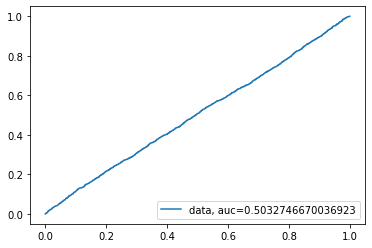

[[66236     0]
 [ 9364     0]]

Naïve Bayes
Accuracy: 0.8761375661375661
Precision: 0.0
Recall: 0.0


/Users/sanjaypenmetsa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
AUC:0.5163270153964367


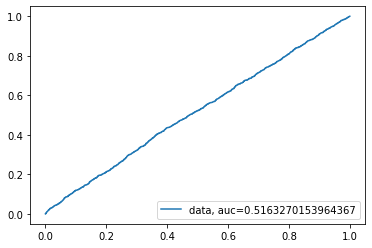

[[66236     0]
 [ 9364     0]]

Decision Tree
Accuracy: 0.8820370370370371
Precision: 0.5219834384858044
Recall: 0.5654634771465186
F1 score: 0.5428542136559361
AUC:0.8530195408343881


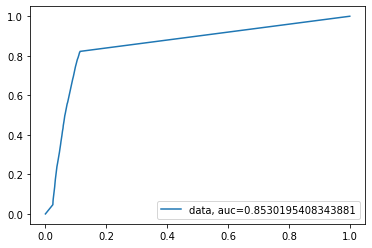

[[61387  4849]
 [ 4069  5295]]

Random Forest Classifier
Accuracy: 0.8995899470899471
Precision: 0.6074154852780806
Recall: 0.5353481418197351
F1 score: 0.5691093829823465
AUC:0.9376802666692015


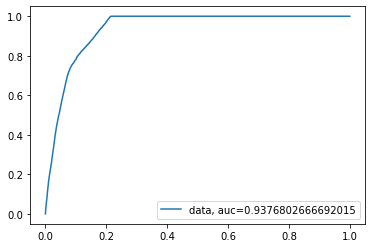

[[62996  3240]
 [ 4351  5013]]

AdaBoost Classifier
Accuracy: 0.8761243386243386
Precision: 0.4666666666666667
Recall: 0.00074754378470739
F1 score: 0.0014926964495148736
AUC:0.5905373394421856


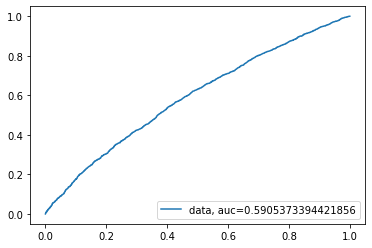

[[66228     8]
 [ 9357     7]]

XGBoost
Accuracy: 0.8870634920634921
Precision: 0.6371181938911022
Recall: 0.20493378897906878
F1 score: 0.3101163542340013
AUC:0.8809332245081527


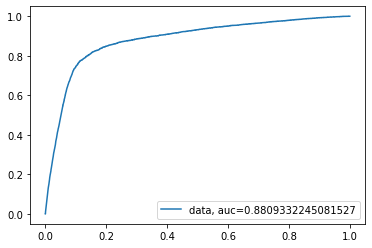

[[65143  1093]
 [ 7445  1919]]


In [29]:
# model with label encoding data
# spliting dependent variables and target variable 
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

createModel(X,y)


Logistic Regression
Accuracy: 0.906084656084656
Precision: 0.0
Recall: 0.0
F1 score: 0.0
AUC:0.486708240978719


/Users/sanjaypenmetsa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


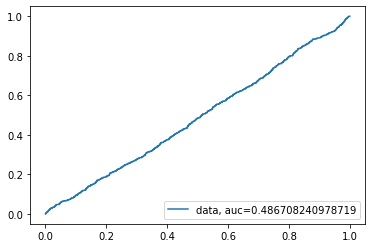

[[68500     0]
 [ 7100     0]]

Naïve Bayes
Accuracy: 0.906084656084656
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/Users/sanjaypenmetsa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC:0.5134962804564613


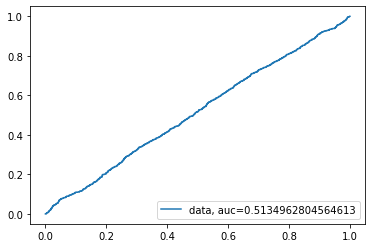

[[68500     0]
 [ 7100     0]]

Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
AUC:1.0


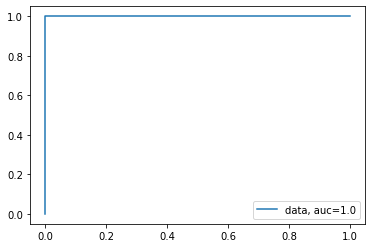

[[68500     0]
 [    0  7100]]

Random Forest Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
AUC:1.0


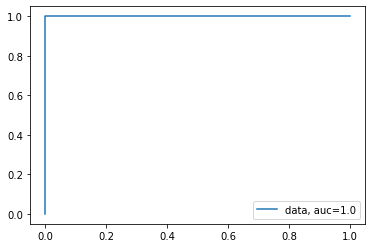

[[68500     0]
 [    0  7100]]

AdaBoost Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
AUC:1.0


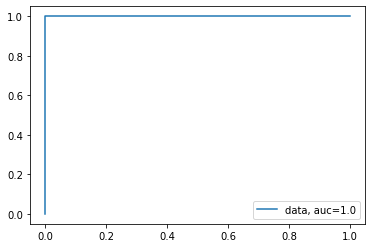

[[68500     0]
 [    0  7100]]

XGBoost
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
AUC:1.0


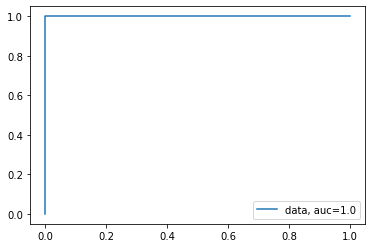

[[68500     0]
 [    0  7100]]


In [30]:
#model with one-hot encoding data
#spliting dependent variables and target variable 
X = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

createModel(X,y)

# Feature selection

In [31]:
# spliting dependent variables and target variable 
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [32]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
fe=sel.fit_transform(X)


Logistic Regression
Accuracy: 0.8761375661375661
Precision: 0.0
Recall: 0.0
F1 score: 0.0
AUC:0.5032746670036923


/Users/sanjaypenmetsa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


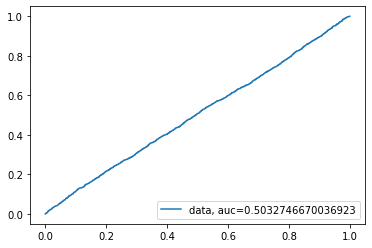

[[66236     0]
 [ 9364     0]]

Naïve Bayes
Accuracy: 0.8761375661375661
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/Users/sanjaypenmetsa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC:0.5163249726187171


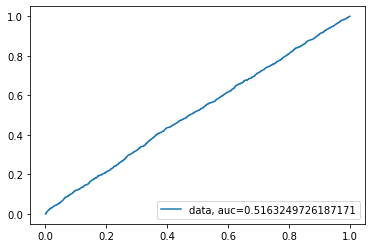

[[66236     0]
 [ 9364     0]]

Decision Tree
Accuracy: 0.8807671957671958
Precision: 0.5171635935661043
Recall: 0.5631140538231525
F1 score: 0.539161554192229
AUC:0.8507096050331361


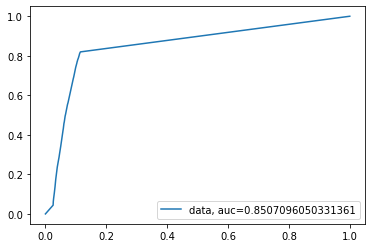

[[61313  4923]
 [ 4091  5273]]

Random Forest Classifier
Accuracy: 0.8994841269841269
Precision: 0.6072426783327257
Recall: 0.5336394703118326
F1 score: 0.5680668447678053
AUC:0.9377176324111427


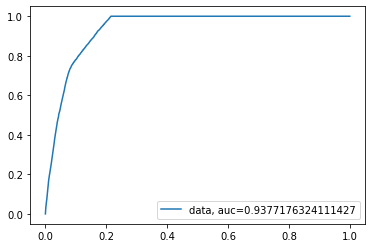

[[63004  3232]
 [ 4367  4997]]

AdaBoost Classifier
Accuracy: 0.8762566137566138
Precision: 0.68
Recall: 0.0018154634771465185
F1 score: 0.0036212589200127804
AUC:0.5848544148595914


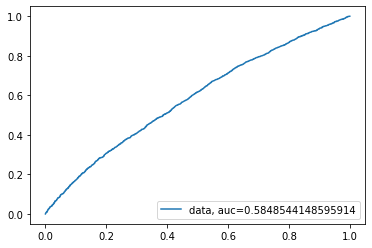

[[66228     8]
 [ 9347    17]]

XGBoost
Accuracy: 0.8866402116402117
Precision: 0.6491359879789632
Recall: 0.1845365228534814
F1 score: 0.2873773490769998
AUC:0.8776272346440448


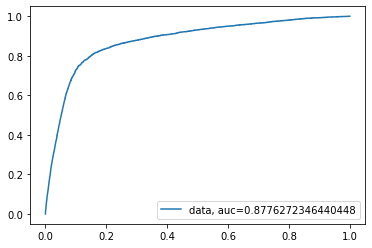

[[65302   934]
 [ 7636  1728]]


In [33]:
createModel(fe,y)

# Handling Imbalance 

In [34]:
X = fe


Logistic Regression
Accuracy: 0.4971502312076567
Precision: 0.0
Recall: 0.0
F1 score: 0.0
AUC:0.5021093728460387


/Users/sanjaypenmetsa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


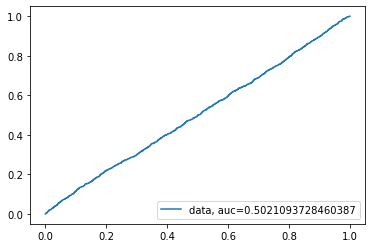

[[9246    0]
 [9352    0]]

Naïve Bayes
Accuracy: 0.5107000752769115
Precision: 0.5183780630105017
Recall: 0.3800256629597947
F1 score: 0.4385488647581441
AUC:0.5119157659002935


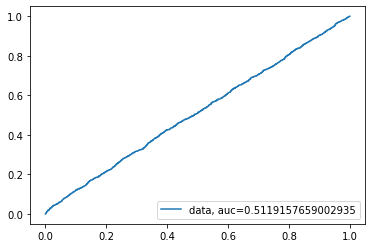

[[5944 3302]
 [5798 3554]]

Decision Tree
Accuracy: 0.8585331756102806
Precision: 0.8508195009917527
Recall: 0.8714713430282293
F1 score: 0.8610216047752364
AUC:0.8500527393807916


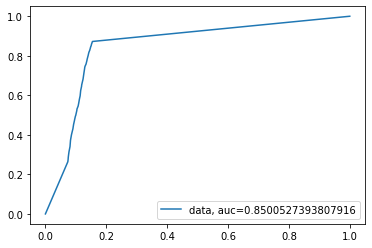

[[7817 1429]
 [1202 8150]]

Random Forest Classifier
Accuracy: 0.8465964082159372
Precision: 0.878420868755095
Recall: 0.8065654405474765
F1 score: 0.8409610346173142
AUC:0.93353083047773


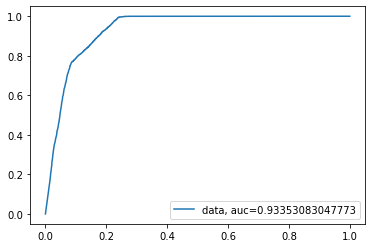

[[8202 1044]
 [1809 7543]]

AdaBoost Classifier
Accuracy: 0.557909452629315
Precision: 0.5633834417769801
Recall: 0.5369974337040205
F1 score: 0.5498740829957298
AUC:0.5783476039484949


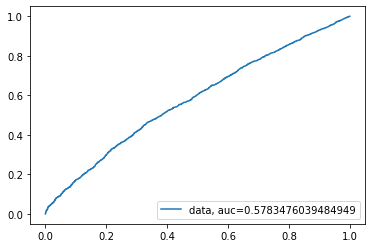

[[5354 3892]
 [4330 5022]]

XGBoost
Accuracy: 0.8268631035595225
Precision: 0.8341325196163906
Recall: 0.8184345594525235
F1 score: 0.8262089810017271
AUC:0.8793195510804663


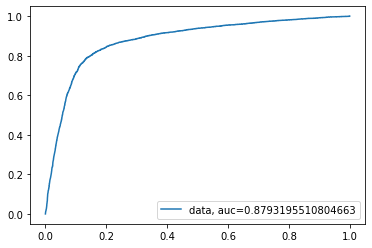

[[7724 1522]
 [1698 7654]]


In [35]:
from imblearn.under_sampling import RandomUnderSampler
X_res, y_res = RandomUnderSampler().fit_resample(X, y)

createModel(X_res, y_res)


Logistic Regression
Accuracy: 0.49897815283213803
Precision: 0.0
Recall: 0.0
F1 score: 0.0
AUC:0.503035371577146


/Users/sanjaypenmetsa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


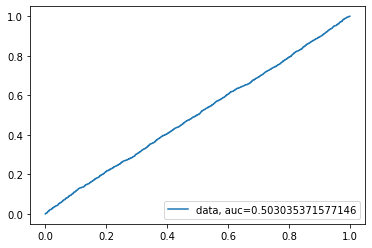

[[66166     0]
 [66437     0]]

Naïve Bayes
Accuracy: 0.5135856654826814
Precision: 0.5174746946213665
Recall: 0.43168716227403403
F1 score: 0.4707040866568193
AUC:0.5137287822567547


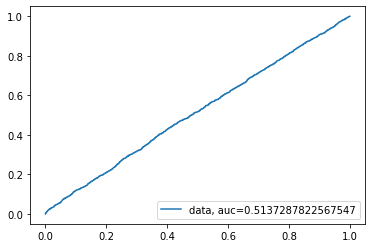

[[39423 26743]
 [37757 28680]]

Decision Tree
Accuracy: 0.939797742132531
Precision: 0.8934918412407776
Recall: 0.9989162665382242
F1 score: 0.9432675019365658
AUC:0.9468039882508441


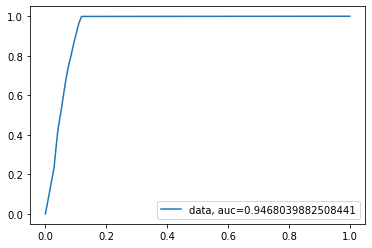

[[58255  7911]
 [   72 66365]]

Random Forest Classifier
Accuracy: 0.9545032917807289
Precision: 0.9178703857435386
Recall: 0.9985399701973298
F1 score: 0.9565073208711512
AUC:0.9724858216718613


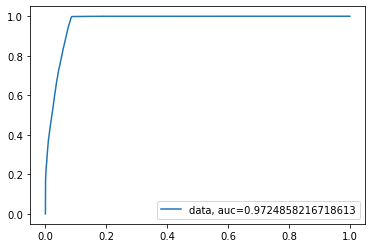

[[60230  5936]
 [   97 66340]]

AdaBoost Classifier
Accuracy: 0.5566993205281932
Precision: 0.5608484116131904
Recall: 0.530939085148336
F1 score: 0.5454840680115363
AUC:0.585353385732168


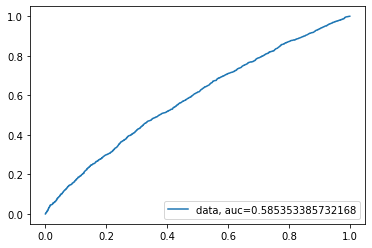

[[38546 27620]
 [31163 35274]]

XGBoost
Accuracy: 0.8573033792598961
Precision: 0.8564997524046758
Recall: 0.8591297018227795
F1 score: 0.8578127113422204
AUC:0.9143669470237097


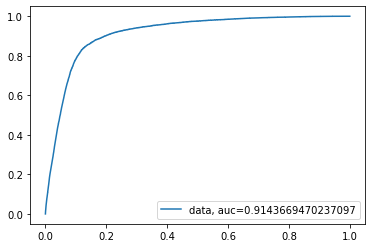

[[56603  9563]
 [ 9359 57078]]


In [36]:
from imblearn.over_sampling import RandomOverSampler
X_res, y_res = RandomOverSampler().fit_resample(X, y)

createModel(X_res, y_res)


Logistic Regression
Accuracy: 0.49897815283213803
Precision: 0.0
Recall: 0.0
F1 score: 0.0
AUC:0.5031831940604952


/Users/sanjaypenmetsa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


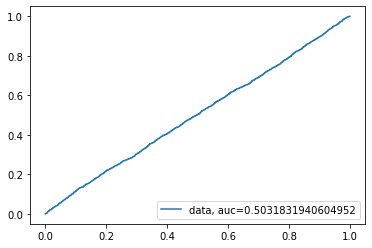

[[66166     0]
 [66437     0]]

Naïve Bayes
Accuracy: 0.5171376213207846
Precision: 0.5125502949944754
Recall: 0.7401146951247046
F1 score: 0.605662341181615
AUC:0.5275350731654918


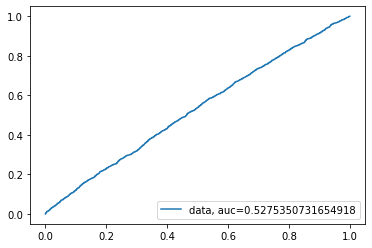

[[19403 46763]
 [17266 49171]]

Decision Tree
Accuracy: 0.9024908938711794
Precision: 0.8710250045071907
Recall: 0.9453617713021358
F1 score: 0.9066722485275435
AUC:0.8987114284313245


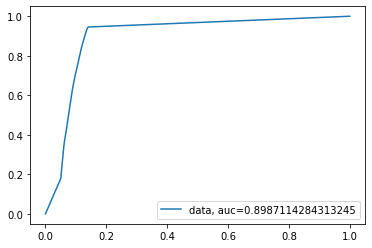

[[56866  9300]
 [ 3630 62807]]

Random Forest Classifier
Accuracy: 0.9224451935476573
Precision: 0.8869685066501275
Recall: 0.9686469888766802
F1 score: 0.926010130079429
AUC:0.9554229209828264


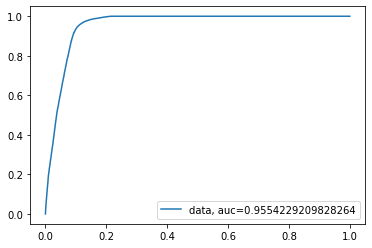

[[57965  8201]
 [ 2083 64354]]

AdaBoost Classifier
Accuracy: 0.5810200372540592
Precision: 0.5765016947245545
Recall: 0.6169905323840631
F1 score: 0.596059328195434
AUC:0.6131288239152153


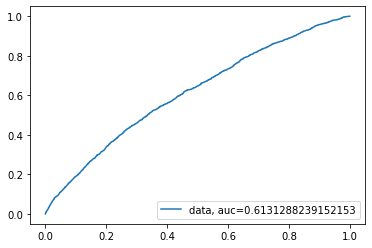

[[36054 30112]
 [25446 40991]]

XGBoost
Accuracy: 0.8775065420842666
Precision: 0.8555017281432375
Recall: 0.909056700332646
F1 score: 0.8814665080673998
AUC:0.9306914534700144


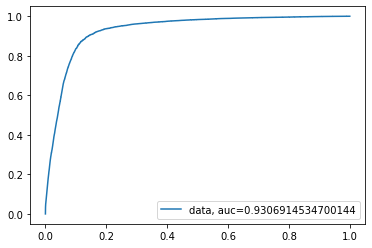

[[55965 10201]
 [ 6042 60395]]


In [37]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)

createModel(X_res, y_res)


Logistic Regression
Accuracy: 0.49778362279039184
Precision: 0.0
Recall: 0.0
F1 score: 0.0
AUC:0.5036128831008937


/Users/sanjaypenmetsa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


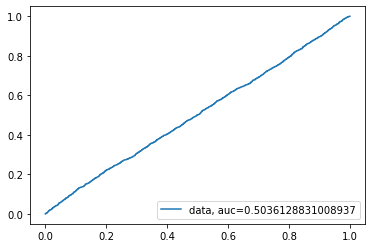

[[64346     0]
 [64919     0]]

Naïve Bayes
Accuracy: 0.5205894867133408
Precision: 0.5170184270078049
Recall: 0.6897826522281613
F1 score: 0.5910341778249995
AUC:0.5249277241419223


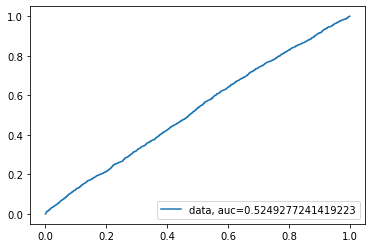

[[22514 41832]
 [20139 44780]]

Decision Tree
Accuracy: 0.9095269407805671
Precision: 0.8775394393371921
Recall: 0.9528181272046704
F1 score: 0.9136307576417763
AUC:0.9082851491127508


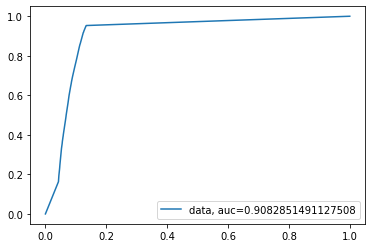

[[55714  8632]
 [ 3063 61856]]

Random Forest Classifier
Accuracy: 0.9259041503887363
Precision: 0.8891170142453347
Recall: 0.9739213481415302
F1 score: 0.929589061236492
AUC:0.9564678227946914


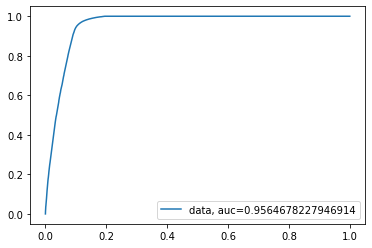

[[56461  7885]
 [ 1693 63226]]

AdaBoost Classifier
Accuracy: 0.5755695663946158
Precision: 0.573783002392169
Recall: 0.6022427948674502
F1 score: 0.5876685355258608
AUC:0.6111639474055264


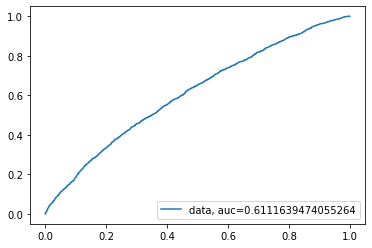

[[35304 29042]
 [25822 39097]]

XGBoost
Accuracy: 0.8878969558658569
Precision: 0.8685179771996492
Recall: 0.9153560590890186
F1 score: 0.8913221188099506
AUC:0.9343224674758023


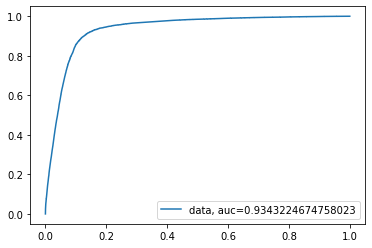

[[55350  8996]
 [ 5495 59424]]


In [38]:
from imblearn.combine import SMOTETomek 
X_res, y_res = SMOTETomek().fit_resample(X, y)

createModel(X_res, y_res)